#Section 01. 결측치 처리
## 1. 결측치 개념

In [136]:
import pandas as pd
url='https://raw.githubusercontent.com/sehakflower/data/main/titanic.csv'
titanic_df= pd.read_csv(url,sep='\t')
titanic_df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [137]:
new_columns=['passengerId', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
'ticket', 'fare', 'cabin', 'embarked']
titanic_df.columns=new_columns
titanic_df.columns

Index(['passengerId', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

##2. 결측치 확인 함수
###isna 함수

In [138]:
titanic_df['age'][titanic_df['age'].isna( )]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
29    NaN
31    NaN
32    NaN
36    NaN
42    NaN
45    NaN
46    NaN
47    NaN
48    NaN
55    NaN
64    NaN
65    NaN
76    NaN
77    NaN
82    NaN
87    NaN
95    NaN
101   NaN
107   NaN
109   NaN
121   NaN
126   NaN
128   NaN
140   NaN
154   NaN
Name: age, dtype: float64

### isnull 함수

In [139]:
titanic_df['age'].isnull( )

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154     True
155    False
Name: age, Length: 156, dtype: bool

In [140]:
titanic_df['age'][titanic_df['age'].isnull( )]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
29    NaN
31    NaN
32    NaN
36    NaN
42    NaN
45    NaN
46    NaN
47    NaN
48    NaN
55    NaN
64    NaN
65    NaN
76    NaN
77    NaN
82    NaN
87    NaN
95    NaN
101   NaN
107   NaN
109   NaN
121   NaN
126   NaN
128   NaN
140   NaN
154   NaN
Name: age, dtype: float64

In [141]:
titanic_df['age'][titanic_df['age'].isnull( )].isnull( ).sum( )

30

###notnull 함수

In [142]:
titanic_df['age'].notnull( )

0       True
1       True
2       True
3       True
4       True
       ...  
151     True
152     True
153     True
154    False
155     True
Name: age, Length: 156, dtype: bool

In [143]:
titanic_df['age'][titanic_df['age'].notnull( )]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
150    51.0
151    22.0
152    55.5
153    40.5
155    51.0
Name: age, Length: 126, dtype: float64

In [144]:
titanic_df.loc[titanic_df['age'].notnull( ),['age', 'name']]

,age,name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"
...,...,...
150,51.0,"Bateman, Rev. Robert James"
151,22.0,"Pears, Mrs. Thomas (Edith Wearne)"
152,55.5,"Meo, Mr. Alfonzo"
153,40.5,"van Billiard, Mr. Austin Blyler"


In [145]:
titanic_df.loc[titanic_df['age'].isnull( ),['age', 'name']]

,age,name
5,NaN,"Moran, Mr. James"
17,NaN,"Williams, Mr. Charles Eugene"
19,NaN,"Masselmani, Mrs. Fatima"
26,NaN,"Emir, Mr. Farred Chehab"
28,NaN,"O'Dwyer, Miss. Ellen ""Nellie"""
29,NaN,"Todoroff, Mr. Lalio"
31,NaN,"Spencer, Mrs. William Augustus (Marie Eugenie)"
32,NaN,"Glynn, Miss. Mary Agatha"
36,NaN,"Mamee, Mr. Hanna"
42,NaN,"Kraeff, Mr. Theodor"


##3. 결측치 처리 방법
###결측치를 다른 문자로 변경하기

In [146]:
titanic_df.head( )

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
titanic_df['cabin']=titanic_df['cabin'].fillna('N')
titanic_df['cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
151      C2
152       N
153       N
154       N
155       N
Name: cabin, Length: 156, dtype: object

In [148]:
titanic_df['cabin'].value_counts( )

N              125
C123             2
C23 C25 C27      2
D26              2
F G73            1
F2               1
B86              1
D47              1
F E69            1
E101             1
B58 B60          1
C110             1
D10 D12          1
A5               1
E31              1
C83              1
F33              1
C85              1
B28              1
C52              1
B30              1
D33              1
B78              1
A6               1
D56              1
C103             1
G6               1
E46              1
C2               1
Name: cabin, dtype: int64

In [149]:
titanic_df['cabin'][0]

'N'

In [150]:
titanic_df['cabin']=titanic_df['cabin'].apply(lambda x : x[0])
titanic_df['cabin']

0      N
1      C
2      N
3      C
4      N
      ..
151    C
152    N
153    N
154    N
155    N
Name: cabin, Length: 156, dtype: object

In [151]:
titanic_df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerId  156 non-null    int64  
 1   survived     156 non-null    int64  
 2   pclass       156 non-null    int64  
 3   name         156 non-null    object 
 4   sex          156 non-null    object 
 5   age          126 non-null    float64
 6   sibsp        156 non-null    int64  
 7   parch        156 non-null    int64  
 8   ticket       156 non-null    object 
 9   fare         156 non-null    float64
 10  cabin        156 non-null    object 
 11  embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


###결측치를 평균값으로 변경하기

In [152]:
titanic_df_copy=titanic_df.copy( )
titanic_df_copy

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,N,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,N,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,N,S


In [153]:
titanic_df_copy['age'].isnull( )

0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154     True
155    False
Name: age, Length: 156, dtype: bool

In [154]:
titanic_df['age']=titanic_df_copy['age'].fillna(titanic_df_copy['age'].mean())
titanic_df_copy['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
151    22.0
152    55.5
153    40.5
154     NaN
155    51.0
Name: age, Length: 156, dtype: float64

###<여기서 잠깐> 데이터프레임 복사 – 얕은 복사와 깊은 복사

In [155]:
copy_titanic_df=titanic_df.copy( )
copy_titanic_df

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.000000,1,0,113776,66.6000,C,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.500000,0,0,A.5. 11206,8.0500,N,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.500000,0,2,A/5. 851,14.5000,N,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,28.141508,0,0,Fa 265302,7.3125,N,S


In [156]:
hex(id(titanic_df))

'0x7f2df90d31f0'

In [157]:
hex(id(copy_titanic_df))

'0x7f2df90d3fd0'

In [158]:
titanic_df.head( )

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [159]:
copy_titanic_df.head( )

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [160]:
copy_titanic_df['age']=0
copy_titanic_df.head( )

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,0,373450,8.0500,N,S


In [161]:
titanic_df.head( )

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


#Section 02. 데이터 변환
##1. 데이터형 변환
###to_numeric 함수

In [162]:
titanic_df1=titanic_df[['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare']]
titanic_df2=titanic_df1.apply(pd.to_numeric, errors='coerce')
titanic_df2

,survived,pclass,name,sex,age,sibsp,parch,fare
0,0,3,NaN,NaN,22.000000,1,0,7.2500
1,1,1,NaN,NaN,38.000000,1,0,71.2833
2,1,3,NaN,NaN,26.000000,0,0,7.9250
3,1,1,NaN,NaN,35.000000,1,0,53.1000
4,0,3,NaN,NaN,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
151,1,1,NaN,NaN,22.000000,1,0,66.6000
152,0,3,NaN,NaN,55.500000,0,0,8.0500
153,0,3,NaN,NaN,40.500000,0,2,14.5000
154,0,3,NaN,NaN,28.141508,0,0,7.3125


In [163]:
titanic_df2.dtypes

survived      int64
pclass        int64
name        float64
sex         float64
age         float64
sibsp         int64
parch         int64
fare        float64
dtype: object

###astype 함수

In [164]:
titanic_df2['survived']=titanic_df2['survived'].astype('float')
titanic_df2['pclass']=titanic_df2['pclass'].astype('float')
titanic_df2['age']=titanic_df2['age'].astype('float')
titanic_df2['sibsp']=titanic_df2['sibsp'].astype('float')
titanic_df2['parch']=titanic_df2['parch'].astype('float')
titanic_df2['fare']=titanic_df2['fare'].astype('float')
titanic_df2.dtypes

survived    float64
pclass      float64
name        float64
sex         float64
age         float64
sibsp       float64
parch       float64
fare        float64
dtype: object

##2. 값 변환
### 숫자형 변수로 바꾸기

In [165]:
titanic_df1=titanic_df[['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare']]
tmp=[]
for each in titanic_df1['sex']:
 if each=='female':
  tmp.append(0)
 else:
  tmp.append(1)
  
titanic_df1['gender']=tmp
titanic_df1

<ipython-input-165-60d10c2626dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['gender']=tmp


,survived,pclass,name,sex,age,sibsp,parch,fare,gender
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
151,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.000000,1,0,66.6000,0
152,0,3,"Meo, Mr. Alfonzo",male,55.500000,0,0,8.0500,1
153,0,3,"van Billiard, Mr. Austin Blyler",male,40.500000,0,2,14.5000,1
154,0,3,"Olsen, Mr. Ole Martin",male,28.141508,0,0,7.3125,1


In [166]:
titanic_df1.drop(columns='sex', inplace=True)
titanic_df1.head( )

<ipython-input-166-01a0b7e2f65e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.drop(columns='sex', inplace=True)


,survived,pclass,name,age,sibsp,parch,fare,gender
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1


In [167]:
titanic_df1.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  156 non-null    int64  
 1   pclass    156 non-null    int64  
 2   name      156 non-null    object 
 3   age       156 non-null    float64
 4   sibsp     156 non-null    int64  
 5   parch     156 non-null    int64  
 6   fare      156 non-null    float64
 7   gender    156 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.9+ KB


###문자형 변수를 명목 변수화하기

In [168]:
condition=lambda x: x.split(',')[1].split('.')[0].strip( )
titanic_df1['title']=titanic_df1['name'].map(condition)
titanic_df1['title'].unique( ) 


<ipython-input-168-70e68f2f4901>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['title']=titanic_df1['name'].map(condition)


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev'], dtype=object)

In [169]:
Special=['Master', 'Don', 'Rev']
for each in Special:
  titanic_df1['title']=titanic_df1['title'].replace(each, 'Special')
  
titanic_df1['title'].unique( )
titanic_df1

<ipython-input-169-3b8c4bda60b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['title']=titanic_df1['title'].replace(each, 'Special')


,survived,pclass,name,age,sibsp,parch,fare,gender,title
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,0,Mrs
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,1,Mr
...,...,...,...,...,...,...,...,...,...
151,1,1,"Pears, Mrs. Thomas (Edith Wearne)",22.000000,1,0,66.6000,0,Mrs
152,0,3,"Meo, Mr. Alfonzo",55.500000,0,0,8.0500,1,Mr
153,0,3,"van Billiard, Mr. Austin Blyler",40.500000,0,2,14.5000,1,Mr
154,0,3,"Olsen, Mr. Ole Martin",28.141508,0,0,7.3125,1,Mr


In [170]:
len(titanic_df1['title'].unique( ))

4

In [171]:
titanic_df1=titanic_df1.drop('name', axis=1)
titanic_df1

,survived,pclass,age,sibsp,parch,fare,gender,title
0,0,3,22.000000,1,0,7.2500,1,Mr
1,1,1,38.000000,1,0,71.2833,0,Mrs
2,1,3,26.000000,0,0,7.9250,0,Miss
3,1,1,35.000000,1,0,53.1000,0,Mrs
4,0,3,35.000000,0,0,8.0500,1,Mr
...,...,...,...,...,...,...,...,...
151,1,1,22.000000,1,0,66.6000,0,Mrs
152,0,3,55.500000,0,0,8.0500,1,Mr
153,0,3,40.500000,0,2,14.5000,1,Mr
154,0,3,28.141508,0,0,7.3125,1,Mr


In [172]:
def convert_title(x):
  if x=="Special":
    return 1
  else:
    return 0

titanic_df1["special_title"]=titanic_df1["title"].apply(convert_title)
titanic_df1.tail(7)

,survived,pclass,age,sibsp,parch,fare,gender,title,special_title
149,0,2,42.000000,0,0,13.0000,1,Special,1
150,0,2,51.000000,0,0,12.5250,1,Special,1
151,1,1,22.000000,1,0,66.6000,0,Mrs,0
152,0,3,55.500000,0,0,8.0500,1,Mr,0
153,0,3,40.500000,0,2,14.5000,1,Mr,0
154,0,3,28.141508,0,0,7.3125,1,Mr,0
155,0,1,51.000000,0,1,61.3792,1,Mr,0


In [173]:
titanic_df1.drop('title', axis=1, inplace=True)
titanic_df1

,survived,pclass,age,sibsp,parch,fare,gender,special_title
0,0,3,22.000000,1,0,7.2500,1,0
1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,26.000000,0,0,7.9250,0,0
3,1,1,35.000000,1,0,53.1000,0,0
4,0,3,35.000000,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...
151,1,1,22.000000,1,0,66.6000,0,0
152,0,3,55.500000,0,0,8.0500,1,0
153,0,3,40.500000,0,2,14.5000,1,0
154,0,3,28.141508,0,0,7.3125,1,0


### 열 데이터를 이용해 열 추가하기

In [174]:
titanic_df1['sibpar']=titanic_df1['sibsp']+titanic_df1['parch']
titanic_df1

,survived,pclass,age,sibsp,parch,fare,gender,special_title,sibpar
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,1
2,1,3,26.000000,0,0,7.9250,0,0,0
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
151,1,1,22.000000,1,0,66.6000,0,0,1
152,0,3,55.500000,0,0,8.0500,1,0,0
153,0,3,40.500000,0,2,14.5000,1,0,2
154,0,3,28.141508,0,0,7.3125,1,0,0


In [175]:
titanic_df1.drop(['sibsp','parch'], axis =1, inplace=True)
titanic_df1

,survived,pclass,age,fare,gender,special_title,sibpar
0,0,3,22.000000,7.2500,1,0,1
1,1,1,38.000000,71.2833,0,0,1
2,1,3,26.000000,7.9250,0,0,0
3,1,1,35.000000,53.1000,0,0,1
4,0,3,35.000000,8.0500,1,0,0
...,...,...,...,...,...,...,...
151,1,1,22.000000,66.6000,0,0,1
152,0,3,55.500000,8.0500,1,0,0
153,0,3,40.500000,14.5000,1,0,2
154,0,3,28.141508,7.3125,1,0,0


In [176]:
titanic_df1['avgfare']=titanic_df1['fare']/titanic_df1['sibpar']
titanic_df1

,survived,pclass,age,fare,gender,special_title,sibpar,avgfare
0,0,3,22.000000,7.2500,1,0,1,7.2500
1,1,1,38.000000,71.2833,0,0,1,71.2833
2,1,3,26.000000,7.9250,0,0,0,inf
3,1,1,35.000000,53.1000,0,0,1,53.1000
4,0,3,35.000000,8.0500,1,0,0,inf
...,...,...,...,...,...,...,...,...
151,1,1,22.000000,66.6000,0,0,1,66.6000
152,0,3,55.500000,8.0500,1,0,0,inf
153,0,3,40.500000,14.5000,1,0,2,7.2500
154,0,3,28.141508,7.3125,1,0,0,inf


In [177]:
titanic_df1['n_family']=titanic_df1['sibpar']+1
titanic_df1['avgfare']=titanic_df1['fare']/titanic_df1['n_family']
titanic_df1

,survived,pclass,age,fare,gender,special_title,sibpar,avgfare,n_family
0,0,3,22.000000,7.2500,1,0,1,3.625000,2
1,1,1,38.000000,71.2833,0,0,1,35.641650,2
2,1,3,26.000000,7.9250,0,0,0,7.925000,1
3,1,1,35.000000,53.1000,0,0,1,26.550000,2
4,0,3,35.000000,8.0500,1,0,0,8.050000,1
...,...,...,...,...,...,...,...,...,...
151,1,1,22.000000,66.6000,0,0,1,33.300000,2
152,0,3,55.500000,8.0500,1,0,0,8.050000,1
153,0,3,40.500000,14.5000,1,0,2,4.833333,3
154,0,3,28.141508,7.3125,1,0,0,7.312500,1


In [178]:
titanic_df1['n_family1']=[1 if i==0 else i+1 for i in titanic_df1['sibpar']]
titanic_df1

,survived,pclass,age,fare,gender,special_title,sibpar,avgfare,n_family,n_family1
0,0,3,22.000000,7.2500,1,0,1,3.625000,2,2
1,1,1,38.000000,71.2833,0,0,1,35.641650,2,2
2,1,3,26.000000,7.9250,0,0,0,7.925000,1,1
3,1,1,35.000000,53.1000,0,0,1,26.550000,2,2
4,0,3,35.000000,8.0500,1,0,0,8.050000,1,1
...,...,...,...,...,...,...,...,...,...,...
151,1,1,22.000000,66.6000,0,0,1,33.300000,2,2
152,0,3,55.500000,8.0500,1,0,0,8.050000,1,1
153,0,3,40.500000,14.5000,1,0,2,4.833333,3,3
154,0,3,28.141508,7.3125,1,0,0,7.312500,1,1


In [179]:
titanic_df1=titanic_df1.drop(['fare','sibpar','n_family1'], axis=1)
titanic_df1

,survived,pclass,age,gender,special_title,avgfare,n_family
0,0,3,22.000000,1,0,3.625000,2
1,1,1,38.000000,0,0,35.641650,2
2,1,3,26.000000,0,0,7.925000,1
3,1,1,35.000000,0,0,26.550000,2
4,0,3,35.000000,1,0,8.050000,1
...,...,...,...,...,...,...,...
151,1,1,22.000000,0,0,33.300000,2
152,0,3,55.500000,1,0,8.050000,1
153,0,3,40.500000,1,0,4.833333,3
154,0,3,28.141508,1,0,7.312500,1


In [180]:
titanic_df1.rename(columns={'gender':'sex', 'special_title':'title', 'avgfare':'fare', 'n_family':'num_family'}, inplace=True)
titanic_df1

,survived,pclass,age,sex,title,fare,num_family
0,0,3,22.000000,1,0,3.625000,2
1,1,1,38.000000,0,0,35.641650,2
2,1,3,26.000000,0,0,7.925000,1
3,1,1,35.000000,0,0,26.550000,2
4,0,3,35.000000,1,0,8.050000,1
...,...,...,...,...,...,...,...
151,1,1,22.000000,0,0,33.300000,2
152,0,3,55.500000,1,0,8.050000,1
153,0,3,40.500000,1,0,4.833333,3
154,0,3,28.141508,1,0,7.312500,1


In [181]:
titanic_df1=titanic_df1[['survived', 'pclass', 'sex', 'age', 'title', 'fare', 'num_family']]
titanic_df1

,survived,pclass,sex,age,title,fare,num_family
0,0,3,1,22.000000,0,3.625000,2
1,1,1,0,38.000000,0,35.641650,2
2,1,3,0,26.000000,0,7.925000,1
3,1,1,0,35.000000,0,26.550000,2
4,0,3,1,35.000000,0,8.050000,1
...,...,...,...,...,...,...,...
151,1,1,0,22.000000,0,33.300000,2
152,0,3,1,55.500000,0,8.050000,1
153,0,3,1,40.500000,0,4.833333,3
154,0,3,1,28.141508,0,7.312500,1


In [182]:
titanic_df1=titanic_df1.dropna( )
titanic_df1.info( ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    156 non-null    int64  
 1   pclass      156 non-null    int64  
 2   sex         156 non-null    int64  
 3   age         156 non-null    float64
 4   title       156 non-null    int64  
 5   fare        156 non-null    float64
 6   num_family  156 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 8.7 KB


#Section 03. 판다스의 통계 함수
##1. 기본 통계 함수
### 데이터의 통계치 확인하기

In [183]:
titanic_df.describe( )

,passengerId,survived,pclass,age,sibsp,parch,fare
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,13.123652,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,21.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,28.141508,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,33.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


###합계 구하기: sum 함수

In [184]:
titanic_df.sum( )

<ipython-input-184-dfb62cf14254>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.sum( )


passengerId                                                12246
survived                                                      54
pclass                                                       378
name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
sex            malefemalefemalefemalemalemalemalemalefemalefe...
age                                                  4390.075238
sibsp                                                         96
parch                                                         62
ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
fare                                                   4385.0956
cabin          NCNCNNENNNGCNNNNNNNNNDNANNNCNNNBNNNNNNNNNNNNNN...
dtype: object

###총 개수 구하기: count 함수

In [185]:
titanic_df.count( )

passengerId    156
survived       156
pclass         156
name           156
sex            156
age            156
sibsp          156
parch          156
ticket         156
fare           156
cabin          156
embarked       155
dtype: int64

###최댓값 구하기: max 함수

In [186]:
titanic_df.max( )

<ipython-input-186-4c72e2656b59>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.max( )


passengerId                                156
survived                                     1
pclass                                       3
name           van Billiard, Mr. Austin Blyler
sex                                       male
age                                       71.0
sibsp                                        5
parch                                        5
ticket                             W.E.P. 5734
fare                                     263.0
cabin                                        N
dtype: object

###최솟값 구하기: min 함수

In [187]:
titanic_df.min( ) 

<ipython-input-187-3d791a318d6e>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.min( )


passengerId                                                 1
survived                                                    0
pclass                                                      1
name           Ahlin, Mrs. Johan (Johanna Persdotter Larsson)
sex                                                    female
age                                                      0.83
sibsp                                                       0
parch                                                       0
ticket                                                 110465
fare                                                     6.75
cabin                                                       A
dtype: object

###평균값 구하기: mean 함수

In [188]:
titanic_df.mean( )

<ipython-input-188-50666dc71b66>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.mean( )


passengerId    78.500000
survived        0.346154
pclass          2.423077
age            28.141508
sibsp           0.615385
parch           0.397436
fare           28.109587
dtype: float64

###중간값 구하기: median 함수

In [189]:
titanic_df.median( )

<ipython-input-189-c050761629fa>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.median( )


passengerId    78.500000
survived        0.000000
pclass          3.000000
age            28.141508
sibsp           0.000000
parch           0.000000
fare           14.454200
dtype: float64

###최빈값 구하기: mode 함수

In [190]:
titanic_df.mode( )

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3.0,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",male,28.141508,0.0,0.0,113803,8.05,N,S
1,2,NaN,NaN,"Allen, Mr. William Henry",NaN,NaN,NaN,NaN,11668,NaN,NaN,NaN
2,3,NaN,NaN,"Andersson, Miss. Ellis Anna Maria",NaN,NaN,NaN,NaN,19950,NaN,NaN,NaN
3,4,NaN,NaN,"Andersson, Miss. Erna Alexandra",NaN,NaN,NaN,NaN,237736,NaN,NaN,NaN
4,5,NaN,NaN,"Andersson, Mr. Anders Johan",NaN,NaN,NaN,NaN,2651,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,NaN,NaN,"Williams, Mr. Charles Duane",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,153,NaN,NaN,"Williams, Mr. Charles Eugene",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,154,NaN,NaN,"Woolner, Mr. Hugh",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,155,NaN,NaN,"Zabour, Miss. Hileni",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###편차 구하기: mad 함수

In [191]:
titanic_df.mad( )

<ipython-input-191-74b461c7b310>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  titanic_df.mad( )


passengerId    39.000000
survived        0.452663
pclass          0.710059
age             9.000001
sibsp           0.773176
parch           0.616535
fare           22.619713
dtype: float64

###분산 구하기: var 함수

In [192]:
titanic_df.var( )

<ipython-input-192-dbd566145b4a>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.var( )


passengerId    2041.000000
survived          0.227792
pclass            0.632754
age             172.230231
sibsp             1.115633
parch             0.757155
fare           1552.442481
dtype: float64

###표준편차 구하기: std 함수

In [193]:
titanic_df.std( )

<ipython-input-193-93a98dbce836>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.std( )


passengerId    45.177428
survived        0.477275
pclass          0.795459
age            13.123652
sibsp           1.056235
parch           0.870146
fare           39.401047
dtype: float64

###왜도 구하기: skew 함수

In [194]:
titanic_df.skew( )

<ipython-input-194-8ce7dcdfbd60>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.skew( )


passengerId    0.000000
survived       0.653058
pclass        -0.912744
age            0.777484
sibsp          2.220685
parch          2.760421
fare           4.176408
dtype: float64

###첨도 구하기: kurt 함수

In [195]:
titanic_df.kurt( )

<ipython-input-195-713d59a258e3>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.kurt( )


passengerId    -1.200000
survived       -1.594120
pclass         -0.803872
age             1.470785
sibsp           4.996881
parch           9.346662
fare           21.109985
dtype: float64

##2. 특정 열의 통계치 구하기

In [196]:
titanic_df['age'].max() # 최댓값 구하기

71.0

In [197]:
titanic_df['age'].min() # 최솟값 구하기

0.83

In [198]:
titanic_df['age'].sum() # 합계 구하기

4390.075238095238

In [199]:
titanic_df['age'].count() # 개수 구하기

156

In [200]:
titanic_df['age'].mean() # 평균값 구하기 1

28.141507936507935

In [201]:
titanic_df['age'].sum()/titanic_df['age'].count() # 평균값 구하기 2

28.141507936507935

In [205]:
titanic_df['age'].std() # 표준편차 구하기 

13.123651589964872

In [203]:
titanic_df['age'].median() # 중간값 구하기

28.141507936507935

In [204]:
titanic_df['age'].mode() # 최빈값 구하기

0    28.141508
Name: age, dtype: float64

#Section 04. [실전] 타이타닉 생존율 예측 모형을 위한 데이터 파악



In [206]:
import pandas as pd
titanic_url='https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic=pd.read_excel(titanic_url, sheet_name='total')
titanic_df=titanic.drop(['body', 'home.dest'], axis=1)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


### 연령별 생존율 파악하기

In [208]:
titanic_df['age_cat']=pd.cut(titanic_df['age'], bins=[0, 3, 7, 15, 30, 60, 100], include_lowest=True, labels=['baby', 'children', 'teenage', 'young',
'adult', 'old'])
titanic_df.groupby('age_cat').mean( )

<ipython-input-208-b50bceb9926e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic_df.groupby('age_cat').mean( )


,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309


In [212]:
# 주피터 노트북 사용자
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
# 주피터 노트북 사용자
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


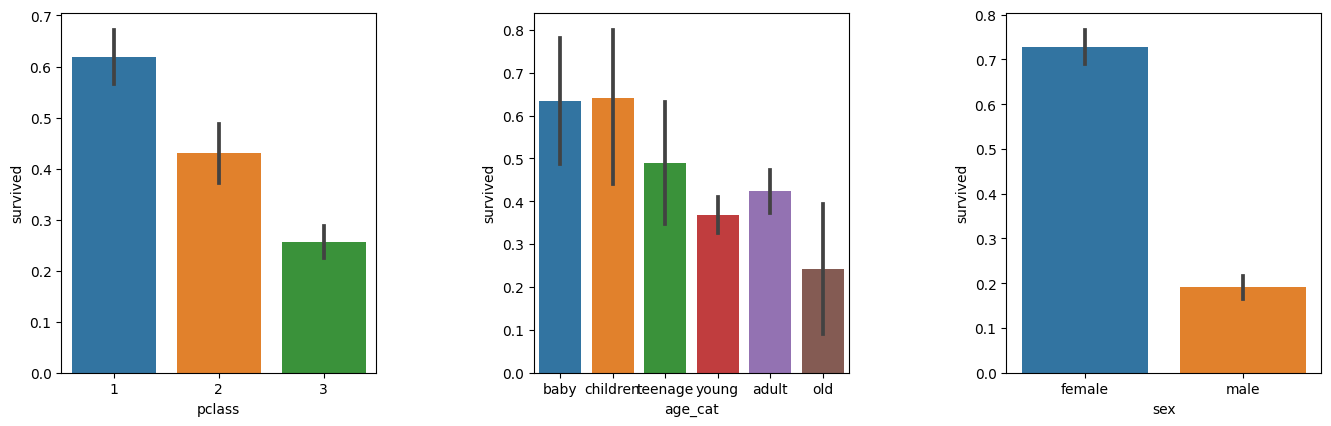

In [220]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
data=titanic_df
plt.figure(figsize=[14, 4])
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic_df)
plt.subplot(132)
sns.barplot(x='age_cat',y='survived', data=titanic_df)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic_df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show( )

In [221]:
titanic_df.groupby(['pclass', 'sex']).mean( )

<ipython-input-221-cb7420ab73a7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic_df.groupby(['pclass', 'sex']).mean( )


survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

In [222]:
boat_survivors=titanic_df[titanic_df['boat'].notnull( )]
nboat_survivors=titanic_df[titanic_df['boat'].isnull( )]
print(boat_survivors.groupby('sex')['survived'].mean( ))
print(nboat_survivors.groupby('sex')['survived'].mean( ))

sex
female    0.996865
male      0.952096
Name: survived, dtype: float64
sex
female    0.142857
male      0.002959
Name: survived, dtype: float64


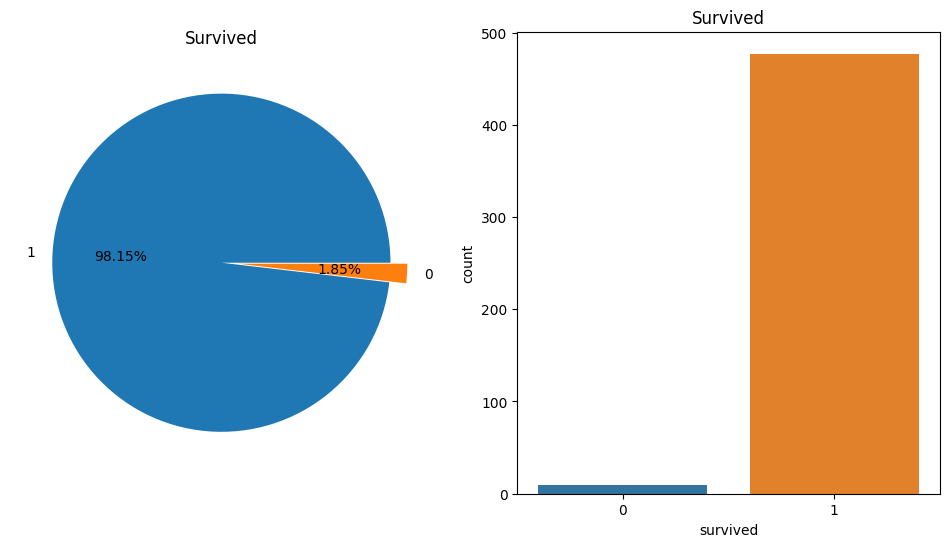

In [224]:
f, ax=plt.subplots(1, 2, figsize=(12, 6))
boat_survivors['survived'].value_counts( ).plot.pie(explode=[0,0.1], autopct='%1.2f%%',
ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=boat_survivors, ax=ax[1])
ax[1].set_title('Survived')
plt.show( )

###귀족 계급의 생존율 파악하기

In [226]:
conversion_special=lambda x: x.split(',')[1].split('.')[0].strip( )
titanic_df['title']=titanic_df['name'].map(conversion_special)
titanic_df['title']=titanic_df['title'].replace('Mlle', 'Miss')
titanic_df['title']=titanic_df['title'].replace('Ms', 'Miss')
titanic_df['title']=titanic_df['title'].replace('Mme', 'Mrs')
Special=['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 'Col', 'Don', 'Dr', 'Major',
'Rev', 'Sir', 'Jonkheer', 'Dona']
for each in Special:
  titanic_df['title']=titanic_df['title'].replace(each, 'Special')
print(titanic_df[['title', 'survived']].groupby(['title'], as_index=False).mean( ))

     title  survived
0     Miss  0.678030
1       Mr  0.162483
2      Mrs  0.787879
3  Special  0.466667


In [227]:
titanic_df.groupby(['sex', 'title']).mean( )

<ipython-input-227-736f1342c5ef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic_df.groupby(['sex', 'title']).mean( )


pclass  survived        age     sibsp     parch       fare
sex    title                                                                
female Miss     2.337121  0.678030  21.824335  0.655303  0.496212  42.566747
       Mrs      1.934343  0.787879  36.918129  0.656566  0.828283  50.655366
       Special  1.000000  1.000000  42.250000  0.250000  0.000000  65.232300
male   Mr       2.381770  0.162483  32.252151  0.282695  0.159841  24.796185
       Special  2.290698  0.441860  18.007575  1.569767  1.023256  38.096026

# Section 05. [실전] 타이타닉 생존율 예측 모형을 위한 데이터 전처리

In [228]:
import pandas as pd
titanic_url='https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic=pd.read_excel(titanic_url,sheet_name='total')
train_1000=titanic.iloc[:1000]
test_309=titanic.iloc[1000:]
train_1000.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)
test_309.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)
train_df=train_1000
test_df=test_309
train_df

<ipython-input-228-c8dfe88b727e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1000.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)
<ipython-input-228-c8dfe88b727e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_309.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,"Markoff, Mr. Marin",male,35.0000,0,0,349213,7.8958,NaN,C
996,3,0,"Markun, Mr. Johann",male,33.0000,0,0,349257,7.8958,NaN,S
997,3,1,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
998,3,0,"Matinoff, Mr. Nicola",male,NaN,0,0,349255,7.8958,NaN,C


In [229]:
train_df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1000 non-null   int64  
 1   survived  1000 non-null   int64  
 2   name      1000 non-null   object 
 3   sex       1000 non-null   object 
 4   age       861 non-null    float64
 5   sibsp     1000 non-null   int64  
 6   parch     1000 non-null   int64  
 7   ticket    1000 non-null   object 
 8   fare      1000 non-null   float64
 9   cabin     283 non-null    object 
 10  embarked  998 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


###name 열

In [230]:
total=[train_df, test_df] # 학습 및 테스트 데이터 세트 결합
for dataset in total:
  dataset['title']=dataset['name'].str.extract('([A-za-z]+)\.', expand=False)
  
train_df['title'].unique( )

<ipython-input-230-1784bd9c2893>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']=dataset['name'].str.extract('([A-za-z]+)\.', expand=False)
<ipython-input-230-1784bd9c2893>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']=dataset['name'].str.extract('([A-za-z]+)\.', expand=False)


array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [231]:
title_mapping={"Mr":1, "Miss":2, 'Ms':2, 'Mlle':2, "Mrs":3, 'Mme':3, 'Master':4, 'Dr':5, 'Rev':5, 'Col': 5, 'Major':5, 'Lady':5, 'Capt':5, 'Sir':5, 'Don':5,
'Jonkheer':5, 'Countess':5}
for dataset in total:
  dataset['title']=dataset['title'].map(title_mapping)
  
train_df['title'].unique( )

<ipython-input-231-36bef303d352>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']=dataset['title'].map(title_mapping)
<ipython-input-231-36bef303d352>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']=dataset['title'].map(title_mapping)


array([ 2.,  4.,  1.,  3.,  5., nan])

In [232]:
# 5개 그룹으로 만들기
total=[train_df, test_df]
titles={'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Special':5}
for dataset in total:
  dataset['title']=dataset.name.str.extract('([A-Za-z]+)\.', expand=False)
  dataset['title']=dataset['title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')
  dataset['title']=dataset['title'].replace('Mlle', 'Miss')
  dataset['title']=dataset['title'].replace('Ms', 'Miss')
  dataset['title']=dataset['title'].replace('Mme', 'Mrs')
  dataset['title']=dataset['title'].map(titles) # 타이틀을 숫자로 변경
  dataset['title']=dataset['title'].fillna(0) # NaN을 0으로 변경
  
train_df=train_df.drop(['name'], axis=1)
test_df=test_df.drop(['name'], axis=1)
test_df

<ipython-input-232-d7489b272495>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']=dataset.name.str.extract('([A-Za-z]+)\.', expand=False)
<ipython-input-232-d7489b272495>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['title']=dataset['title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')
<ipython-input-232-d7489b272495>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
1000,3,1,male,NaN,0,0,367228,7.7500,NaN,Q,1
1001,3,1,female,NaN,2,0,367226,23.2500,NaN,Q,2
1002,3,1,female,NaN,2,0,367226,23.2500,NaN,Q,2
1003,3,1,male,NaN,2,0,367226,23.2500,NaN,Q,1
1004,3,1,female,NaN,0,0,330932,7.7875,NaN,Q,2
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5,1,0,2665,14.4542,NaN,C,2
1305,3,0,female,NaN,1,0,2665,14.4542,NaN,C,2
1306,3,0,male,26.5,0,0,2656,7.2250,NaN,C,1
1307,3,0,male,27.0,0,0,2670,7.2250,NaN,C,1


### age 열

In [233]:
train_df['age'].fillna(train_df.groupby('title')['age'].transform('median'), inplace=True)
test_df['age'].fillna(test_df.groupby('title')['age'].transform('median'), inplace=True)
test_df['age']

1000    25.75
1001    18.00
1002    18.00
1003    25.75
1004    18.00
        ...  
1304    14.50
1305    18.00
1306    26.50
1307    27.00
1308    29.00
Name: age, Length: 309, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


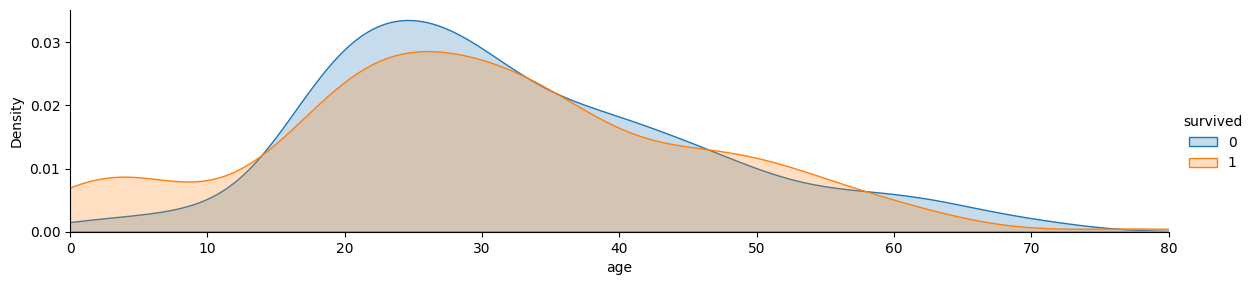

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
facet=sns.FacetGrid(train_1000, hue="survived", aspect=4)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(0, train_1000['age'].max( )))
facet.add_legend( )
sns.axes_style("darkgrid")
plt.show( )

In [235]:
data=[train_df, test_df]
for dataset1 in data:
  dataset1['age']=dataset1['age'].astype(int)
  dataset1.loc[ dataset1['age']<=11, 'age']=0
  dataset1.loc[(dataset1['age']>11)&(dataset1['age']<=18), 'age']=1
  dataset1.loc[(dataset1['age']>18)&(dataset1['age']<=22), 'age']=2
  dataset1.loc[(dataset1['age']>22)&(dataset1['age']<=27), 'age']=3
  dataset1.loc[(dataset1['age']>27)&(dataset1['age']<=33), 'age']=4
  dataset1.loc[(dataset1['age']>33)&(dataset1['age']<=40), 'age']=5
  dataset1.loc[(dataset1['age']>40)&(dataset1['age']<=66), 'age']=6
  dataset1.loc[ dataset1['age']>66, 'age']=6
  
train_df['age'].value_counts( )

4    242
6    206
3    141
5    141
2    126
1     80
0     64
Name: age, dtype: int64

### sex 열

In [236]:
sex_mapping={'male':0, 'female':1}
for dataset in data:
  dataset['sex']=dataset['sex'].map(sex_mapping)
  
train_df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,1,1,4,0,0,24160,211.3375,B5,S,2
1,1,1,0,0,1,2,113781,151.5500,C22 C26,S,4
2,1,0,1,0,1,2,113781,151.5500,C22 C26,S,2
3,1,0,0,4,1,2,113781,151.5500,C22 C26,S,1
4,1,0,1,3,1,2,113781,151.5500,C22 C26,S,3
...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,0,5,0,0,349213,7.8958,NaN,C,1
996,3,0,0,4,0,0,349257,7.8958,NaN,S,1
997,3,1,1,5,0,0,2649,7.2250,NaN,C,3
998,3,0,0,4,0,0,349255,7.8958,NaN,C,1


###embarked, pclass 열

<Axes: >

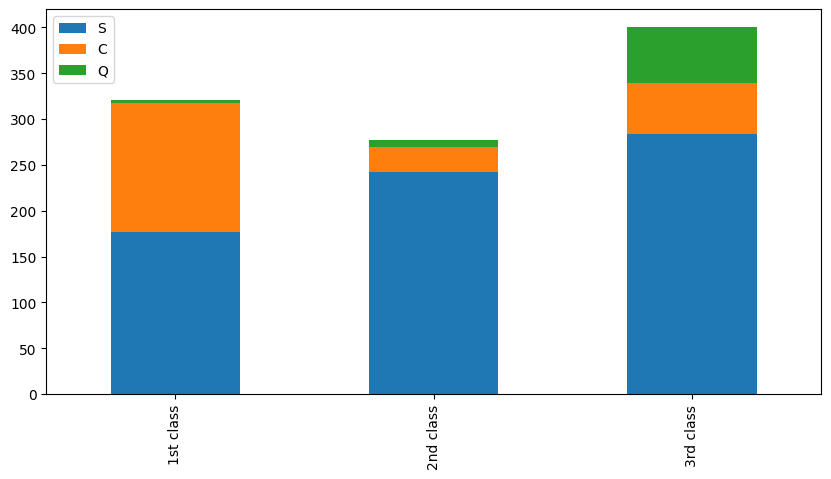

In [237]:
pclass1=train_df[train_df['pclass']==1]['embarked'].value_counts( )
pclass2=train_df[train_df['pclass']==2]['embarked'].value_counts( )
pclass3=train_df[train_df['pclass']==3]['embarked'].value_counts( )
df=pd.DataFrame([pclass1, pclass2, pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [238]:
for dataset in data:
  dataset['embarked']=dataset['embarked'].fillna('S')
len(train_df['embarked'].isnull( ))

1000

In [239]:
embarked_mapping={'S':0, 'C':1, 'Q':2}
for dataset in data: # data=[train_df, test_df]
  dataset['embarked']=dataset['embarked'].map(embarked_mapping)
train_df['embarked']

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    0
997    1
998    1
999    2
Name: embarked, Length: 1000, dtype: int64

### sibsp, parch 열

In [240]:
data=[train_df, test_df]
for dataset in data:
  dataset['sibpar']=dataset['sibsp']+dataset['parch']
  dataset.loc[dataset['sibpar']>0, 'n_alone']=0
  dataset.loc[dataset['sibpar']==0, 'n_alone']=1
  dataset['n_alone']=dataset['n_alone'].astype(int)
test_df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,sibpar,n_alone
1000,3,1,0,3,0,0,367228,7.7500,NaN,2,1,0,1
1001,3,1,1,1,2,0,367226,23.2500,NaN,2,2,2,0
1002,3,1,1,1,2,0,367226,23.2500,NaN,2,2,2,0
1003,3,1,0,3,2,0,367226,23.2500,NaN,2,1,2,0
1004,3,1,1,1,0,0,330932,7.7875,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,1,1,0,2665,14.4542,NaN,1,2,1,0
1305,3,0,1,1,1,0,2665,14.4542,NaN,1,2,1,0
1306,3,0,0,3,0,0,2656,7.2250,NaN,1,1,0,1
1307,3,0,0,3,0,0,2670,7.2250,NaN,1,1,0,1


In [241]:
train_df['n_alone'].value_counts( )

1    584
0    416
Name: n_alone, dtype: int64

In [242]:
test_df['n_alone'].value_counts( )

1    206
0    103
Name: n_alone, dtype: int64

###cabin 열

In [243]:
train_df.cabin.value_counts( )

C23 C25 C27        6
B57 B59 B63 B66    5
B96 B98            4
D                  4
F4                 4
                  ..
B102               1
B39                1
D40                1
D34                1
F E46              1
Name: cabin, Length: 180, dtype: int64

In [245]:
for dataset in data:
  dataset['cabin']=dataset['cabin'].str[:1]
train_df.cabin.value_counts()

C    94
B    65
D    46
E    38
A    22
F    17
T     1
Name: cabin, dtype: int64

<Axes: >

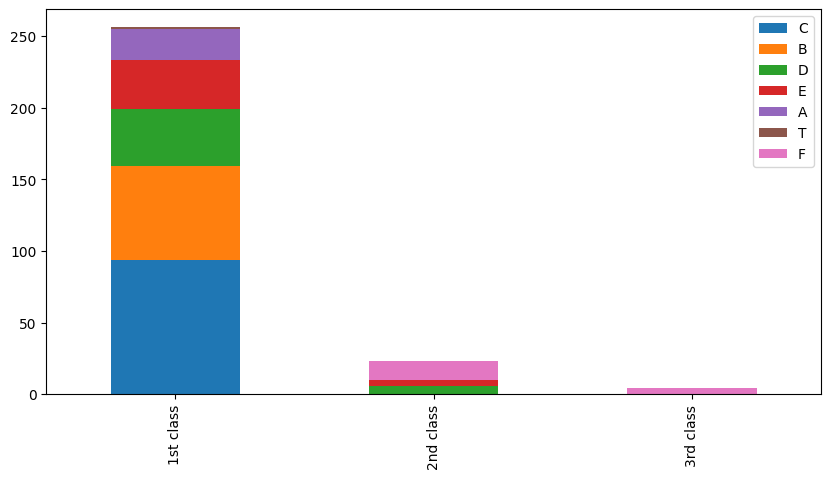

In [246]:
pclass1=train_df[train_df['pclass']==1]['cabin'].value_counts( )
pclass2=train_df[train_df['pclass']==2]['cabin'].value_counts( )
pclass3=train_df[train_df['pclass']==3]['cabin'].value_counts( )
df=pd.DataFrame([pclass1, pclass2, pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

### fare 열

In [247]:
train_df["fare"].fillna(train_df.groupby('pclass')['fare'].transform('median'),
inplace=True)
test_df["fare"].fillna(test_df.groupby('pclass')['fare'].transform('median'),
inplace=True)
for dataset in data:
  dataset.loc[ dataset['fare']<=20, 'fare']=1
  dataset.loc[(dataset['fare']>20)&(dataset['fare']<=30), 'fare']=2
  dataset.loc[(dataset['fare']>30)&(dataset['fare']<=50), 'fare']=3
  dataset.loc[(dataset['fare']>50)&(dataset['fare']<=100), 'fare']=4
  dataset.loc[ dataset['fare']>100, 'fare']=5
train_df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,sibpar,n_alone
0,1,1,1,4,0,0,24160,5.0,B,0,2,0,1
1,1,1,0,0,1,2,113781,5.0,C,0,4,3,0
2,1,0,1,0,1,2,113781,5.0,C,0,2,3,0
3,1,0,0,4,1,2,113781,5.0,C,0,1,3,0
4,1,0,1,3,1,2,113781,5.0,C,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,0,5,0,0,349213,1.0,NaN,1,1,0,1
996,3,0,0,4,0,0,349257,1.0,NaN,0,1,0,1
997,3,1,1,5,0,0,2649,1.0,NaN,1,3,0,1
998,3,0,0,4,0,0,349255,1.0,NaN,1,1,0,1


###열 추가하기: 개인별 요금을 나타내는 fare_person

In [248]:
for dataset1 in data:
  dataset1['fare_person']=dataset1['fare']/(dataset1['sibpar']+1)
  dataset1['fare_person']=dataset1['fare_person'].astype(int)
train_df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,sibpar,n_alone,fare_person
0,1,1,1,4,0,0,24160,5.0,B,0,2,0,1,5
1,1,1,0,0,1,2,113781,5.0,C,0,4,3,0,1
2,1,0,1,0,1,2,113781,5.0,C,0,2,3,0,1
3,1,0,0,4,1,2,113781,5.0,C,0,1,3,0,1
4,1,0,1,3,1,2,113781,5.0,C,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,0,0,5,0,0,349213,1.0,NaN,1,1,0,1,1
996,3,0,0,4,0,0,349257,1.0,NaN,0,1,0,1,1
997,3,1,1,5,0,0,2649,1.0,NaN,1,3,0,1,1
998,3,0,0,4,0,0,349255,1.0,NaN,1,1,0,1,1


###최종 데이터

In [249]:
X_columns=['pclass', 'sex', 'age', 'embarked', 'title', 'sibpar', 'n_alone', 'fare_person']
y_column=['survived']
X_train=train_df[X_columns]
y_train=train_df[y_column]
y_train
X_train

,pclass,sex,age,embarked,title,sibpar,n_alone,fare_person
0,1,1,4,0,2,0,1,5
1,1,0,0,0,4,3,0,1
2,1,1,0,0,2,3,0,1
3,1,0,4,0,1,3,0,1
4,1,1,3,0,3,3,0,1
...,...,...,...,...,...,...,...,...
995,3,0,5,1,1,0,1,1
996,3,0,4,0,1,0,1,1
997,3,1,5,1,3,0,1,1
998,3,0,4,1,1,0,1,1


In [250]:
X_columns=['pclass', 'sex', 'age', 'embarked', 'title', 'sibpar', 'n_alone', 'fare_person']
y_column=['survived']
X_test=test_df[X_columns]
y_test=test_df[y_column]
X_test
y_test

,survived
1000,1
1001,1
1002,1
1003,1
1004,1
...,...
1304,0
1305,0
1306,0
1307,0
